### Dataset

In this homework, we will use the Car price dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
```

We'll keep working with the `MSRP` variable, and we'll transform it to a classification task. 

In [222]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-02 11:15:43--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.1s    

2023-10-02 11:15:43 (13.9 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [223]:
data = pd.read_csv("car_price_data.csv")

In [224]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Features

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`,
* `MSRP`

### Data preparation

* Select only the features from above and transform their names using the next line:
  ```
  data.columns = data.columns.str.replace(' ', '_').str.lower()
  ```
* Fill in the missing values of the selected features with 0.
* Rename `MSRP` variable to `price`.

In [225]:
data = data.loc[:, ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', \
             'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']]

In [226]:
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [227]:
data = data.fillna(0)

In [228]:
data = data.rename(columns={'msrp': 'price'})

In [322]:
# data

### Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

- **`AUTOMATIC`**
- `MANUAL`
- `AUTOMATED_MANUAL`
- `DIRECT_DRIVE`


In [230]:
data['transmission_type'].mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- `engine_hp` and `year`
- `engine_hp` and `engine_cylinders`
- `highway_mpg` and `engine_cylinders`
- **`highway_mpg` and `city_mpg`**

In [231]:
data.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [232]:
data_num = data.select_dtypes(exclude=['object'])
data_num.corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


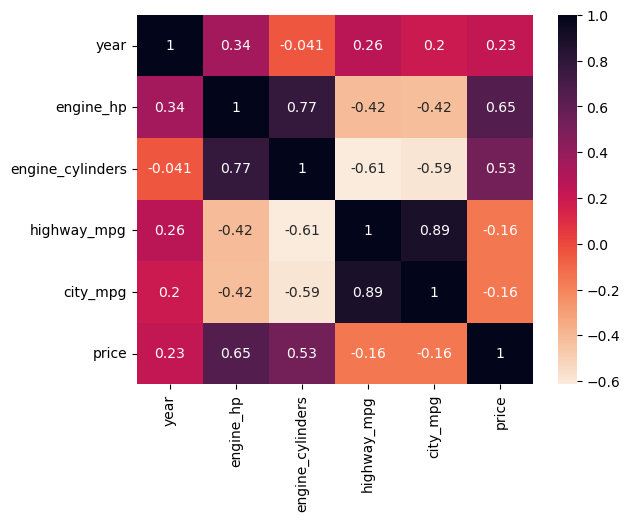

In [233]:
# Plot heatmap to visualize correlation
sns.heatmap(data_num.corr(), annot=True, cmap="rocket_r")
plt.show()

### Make `price` binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

In [323]:
# data

In [235]:
data['price'].mean() 

40594.737032063116

In [236]:
data['above_average'] = [1 if (price > data['price'].mean()) else 0 for price in data['price']]

In [324]:
# data

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`above_average`) is not in your dataframe.


In [238]:
from sklearn.model_selection import train_test_split

In [253]:
df_full_train, df_test = train_test_split(data, 
                                            test_size=0.2, 
                                            random_state=42)

In [325]:
# df_full_train

In [255]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [256]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [257]:
df_train.shape

(7148, 11)

In [258]:
y_train = df_train.above_average.values 
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [326]:
# df_train

In [261]:
df_train.drop(['price', 'above_average'], axis=1, inplace=True)
df_val.drop(['price', 'above_average'], axis=1, inplace=True)
df_test.drop(['price', 'above_average'], axis=1, inplace=True)

In [263]:
df_train.shape

(7148, 9)

In [264]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

### Question 3

* Calculate the mutual information score between `above_average` and other categorical variables in our dataset. 
  Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?
  
- `make`
- `model`
- **`transmission_type`**
- `vehicle_style`


In [265]:
from sklearn.metrics import mutual_info_score

mutual_info_score(df_full_train.above_average, df_full_train.make)

0.2387236479073192

In [266]:
# to apply this function on all columns, let's use apply method. 
# apply method takes in one argument only but mutual_info_score takes two.
# create a wrapper fn for mutual_info_score that takes one arg

def mutual_info_score_fn(col):
    return mutual_info_score(df_full_train.above_average, col)

In [267]:
categorical = df_full_train.select_dtypes(include=['object']).columns
categorical

Index(['make', 'model', 'transmission_type', 'vehicle_style'], dtype='object')

In [268]:
mi = df_full_train[categorical].apply(mutual_info_score_fn).round(2)

In [269]:
mi.sort_values()

transmission_type    0.02
vehicle_style        0.08
make                 0.24
model                0.46
dtype: float64

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.60
- 0.72
- 0.84
- 0.95

In [270]:
df_train[categorical].nunique()

make                  48
model                869
transmission_type      5
vehicle_style         16
dtype: int64

In [271]:
# DictVectorizer only encodes categorical vars automically, so we can pass all columns to the vectorizer

train_dicts = df_train.to_dict(orient='records')
train_dicts[0]

{'make': 'Mitsubishi',
 'model': 'Endeavor',
 'year': 2011,
 'engine_hp': 225.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'AUTOMATIC',
 'vehicle_style': '4dr SUV',
 'highway_mpg': 19,
 'city_mpg': 15}

In [272]:
# Encoding categorical variables using DictVectorizer

from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False) # Otherwise it returns a Compressed Sparse Row format matrix from scipy, but we want an array

In [273]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [274]:
dv.transform(train_dicts)

array([[1.500e+01, 6.000e+00, 2.250e+02, ..., 0.000e+00, 0.000e+00,
        2.011e+03],
       [1.700e+01, 6.000e+00, 2.760e+02, ..., 0.000e+00, 0.000e+00,
        2.009e+03],
       [1.200e+01, 1.000e+01, 5.700e+02, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       ...,
       [1.700e+01, 6.000e+00, 2.600e+02, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       [1.900e+01, 4.000e+00, 1.360e+02, ..., 0.000e+00, 0.000e+00,
        1.993e+03],
       [1.700e+01, 6.000e+00, 3.650e+02, ..., 1.000e+00, 0.000e+00,
        2.015e+03]])

In [318]:
# dv.get_feature_names_out()

In [276]:
X_train = dv.transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [277]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [278]:
model.intercept_[0]

-0.08919319779743098

In [319]:
# model.coef_[0]

In [320]:
# dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

In [281]:
# Probability of [0, 1]. We are interested in 1
model.predict_proba(X_val)

array([[0.99126614, 0.00873386],
       [0.00966714, 0.99033286],
       [0.99842564, 0.00157436],
       ...,
       [0.99854045, 0.00145955],
       [0.02820499, 0.97179501],
       [0.03751755, 0.96248245]])

In [282]:
y_pred = model.predict_proba(X_val)[:,1]

In [283]:
y_pred = (y_pred > 0.5).astype(int)

In [284]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)
accuracy

0.9345362987830466

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `year`
- **`engine_hp`**
- `transmission_type`
- `city_mpg`

> **Note**: the difference doesn't have to be positive

In [285]:
features_list = df_train.columns
features_list

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg'],
      dtype='object')

In [321]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
train_dicts[0]

{'make': 'Mitsubishi',
 'model': 'Endeavor',
 'year': 2011,
 'engine_hp': 225.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'AUTOMATIC',
 'vehicle_style': '4dr SUV',
 'highway_mpg': 19,
 'city_mpg': 15}

In [287]:
dv5 = DictVectorizer(sparse=False)
dv5.fit(train_dicts)
X_train = dv5.transform(train_dicts)
X_val = dv5.transform(val_dicts)

In [288]:
model5 = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model5.fit(X_train, y_train)
y_pred = model5.predict(X_val)
score_all_cols = accuracy_score(y_val, y_pred)
score_all_cols
# score.append(accuracy_score(y_val, y_pred))

0.9345362987830466

In [289]:
score = []
for features in features_list:
    cols = list(set(features_list) - set([features]))
#     print(features, cols)
    df5_train = df_train[cols]
    df5_val = df_val[cols]
    train_dicts = df5_train.to_dict(orient='records')
    val_dicts = df5_val.to_dict(orient='records')

    dv5 = DictVectorizer(sparse=False)
    dv5.fit(train_dicts)
    X_train = dv5.transform(train_dicts)
    X_val = dv5.transform(val_dicts)
    
    model5 = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model5.fit(X_train, y_train)
    y_pred = model5.predict(X_val)
    
    res = accuracy_score(y_val, y_pred)
    score.append(res)
    diff = score_all_cols - res
    print(features, res, diff)

make 0.9437683592110785 -0.00923206042803193
model 0.9160721779269828 0.018464120856063748
year 0.9471254720939991 -0.01258917331095255
engine_hp 0.9303399076793957 0.004196391103650887
engine_cylinders 0.946286193873269 -0.011749895090222395
transmission_type 0.9458665547629039 -0.011330255979857373
vehicle_style 0.9282417121275703 0.00629458665547622
highway_mpg 0.9467058329836341 -0.012169534200587528
city_mpg 0.946286193873269 -0.011749895090222395


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to `42`.
* This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
* Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

- **0**
- 0.01
- 0.1
- 1
- 10

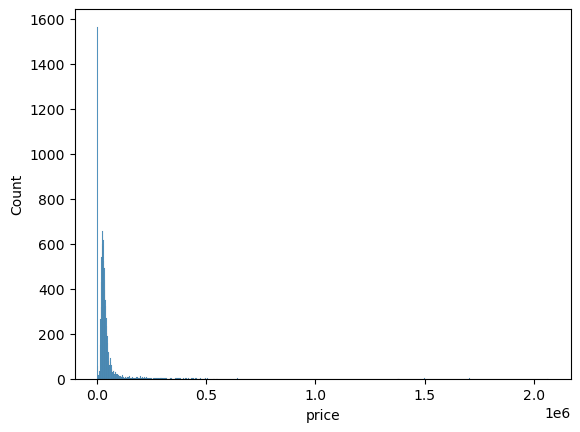

In [290]:
sns.histplot(data.price)
plt.show()

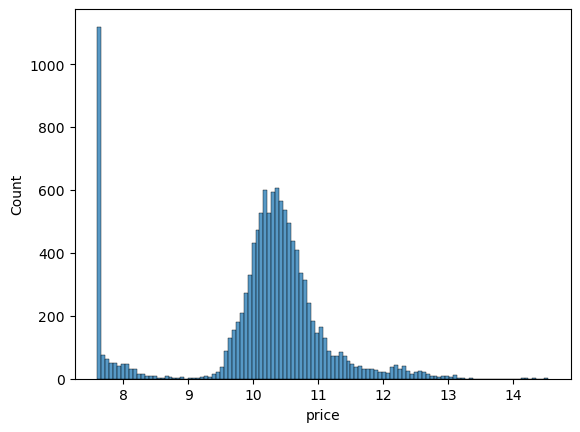

In [291]:
sns.histplot(np.log1p(data.price))
plt.show()

In [308]:
data['price_log'] = np.log1p(data.price)

In [309]:
df = data.copy()

In [310]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average,price_log
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1,10.739349
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1,10.612779
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0,10.500977
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0,10.290483
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0,10.448744
...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1,10.739024
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1,10.945018
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1,10.832122
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1,10.838031


In [311]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [312]:
y_full_train = df_full_train.price_log.values
y_train = df_train.price_log.values
y_val = df_val.price_log.values
y_test = df_test.price_log.values

In [313]:
df_train.drop(['price', 'price_log', 'above_average'], axis=1, inplace=True)
df_val.drop(['price', 'price_log', 'above_average'], axis=1, inplace=True)
df_test.drop(['price', 'price_log', 'above_average'], axis=1, inplace=True)

In [314]:
from sklearn.linear_model import Ridge

In [315]:
def rmse(y_true, y_pred):
    se = (y_true - y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [316]:
alpha = [0, 0.01, 0.1, 1, 10]

for a in alpha:
    model = Ridge(solver='sag', random_state=42, alpha=a)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    error = rmse(y_val, y_pred)
    print(f"Alpha = {a}, RMSE= {error}")

Alpha = 0, RMSE= 0.4966279971107495
Alpha = 0.01, RMSE= 0.4966281466536559
Alpha = 0.1, RMSE= 0.49662949252650784
Alpha = 1, RMSE= 0.49667121512343393
Alpha = 10, RMSE= 0.49689162382701174


## Submit the results

* Submit your results here: https://forms.gle/FFfNjEP4jU4rxnL26
* You can submit your solution multiple times. In this case, only the last submission will be used 
* If your answer doesn't match options exactly, select the closest one


## Deadline

The deadline for submitting is 2 October (Monday), 23:00 CEST.

After that, the form will be closed.
